In [2]:
# importing libraries
import os
import zipfile  
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
import matplotlib.pyplot as plt

In [5]:
# Data
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-10-11 14:03:30--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.200.240, 142.250.201.16, 142.250.201.48, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.200.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M  1.84MB/s    in 41s     

2022-10-11 14:04:12 (1.60 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [6]:
# Extract Data
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [7]:
base_dir = 'cats_and_dogs_filtered'

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'vectorize.py', 'validation']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [8]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.472.jpg', 'cat.466.jpg', 'cat.600.jpg', 'cat.215.jpg', 'cat.548.jpg', 'cat.909.jpg', 'cat.100.jpg', 'cat.329.jpg', 'cat.709.jpg', 'cat.845.jpg']
['dog.926.jpg', 'dog.320.jpg', 'dog.298.jpg', 'dog.517.jpg', 'dog.181.jpg', 'dog.819.jpg', 'dog.263.jpg', 'dog.211.jpg', 'dog.711.jpg', 'dog.442.jpg']


In [9]:
print('total training cat images :', len(os.listdir(train_cats_dir)))
print('total training dog images :', len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


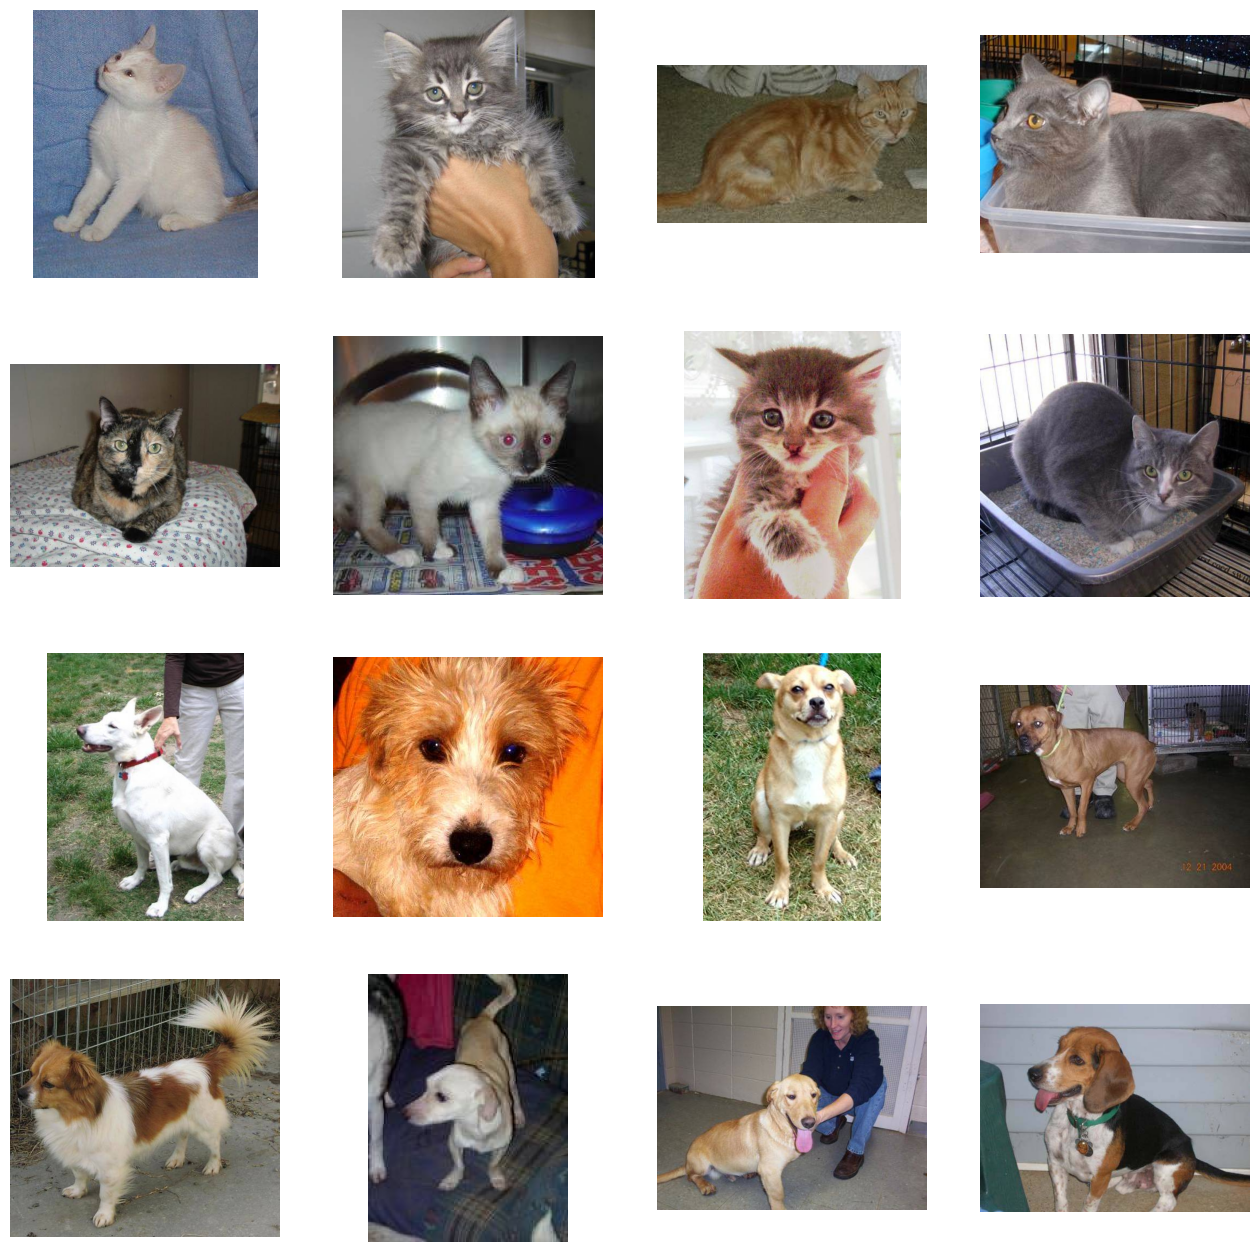

In [10]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

In [12]:
# model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

In [13]:
# compile
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics = ['accuracy'])

In [14]:
# Data Generator
from asyncio import base_tasks


train_datagen = ImageDataGenerator(rescale = 1.0/255.)
test_datagen  = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                        batch_size=20,
                                                        class_mode='binary',
                                                        target_size= (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
# Training
history = model.fit(
            train_generator,
            steps_per_epoch=100,
            epochs=15,
            validation_data=validation_generator,
            validation_steps=50,
            verbose=1
            )

Epoch 1/15
100/100 [==============================] - 94s 895ms/step - loss: 0.8043 - accuracy: 0.5470 - val_loss: 0.6568 - val_accuracy: 0.6400
Epoch 2/15
100/100 [==============================] - 93s 927ms/step - loss: 0.6485 - accuracy: 0.6345 - val_loss: 0.5880 - val_accuracy: 0.7000
Epoch 3/15
100/100 [==============================] - 94s 941ms/step - loss: 0.5613 - accuracy: 0.7100 - val_loss: 0.5743 - val_accuracy: 0.7050
Epoch 4/15
100/100 [==============================] - 96s 960ms/step - loss: 0.4820 - accuracy: 0.7715 - val_loss: 0.6133 - val_accuracy: 0.6790
Epoch 5/15
100/100 [==============================] - 84s 840ms/step - loss: 0.3872 - accuracy: 0.8310 - val_loss: 0.6590 - val_accuracy: 0.7050
Epoch 6/15
100/100 [==============================] - 91s 916ms/step - loss: 0.3108 - accuracy: 0.8685 - val_loss: 0.6251 - val_accuracy: 0.7170
Epoch 7/15
100/100 [==============================] - 91s 913ms/step - loss: 0.2310 - accuracy: 0.9055 - val_loss: 0.7715 - val_ac

In [17]:
# Visualizing Intermediate Representations
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

#  Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

In [18]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255.0

1/1 [==============================] - 1s 648ms/step


/tmp/ipykernel_4186/2981085506.py:21: RuntimeWarning: invalid value encountered in divide
  x /= x.std ()


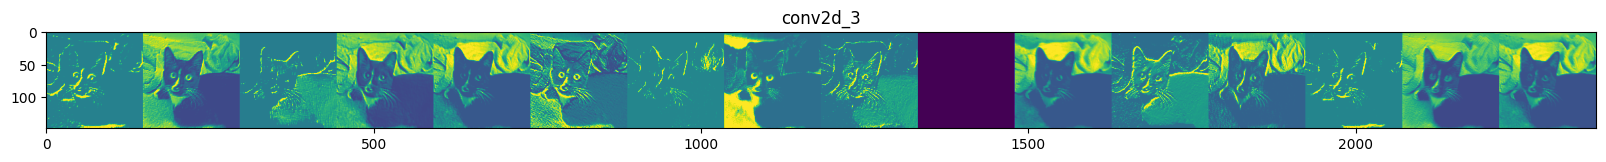

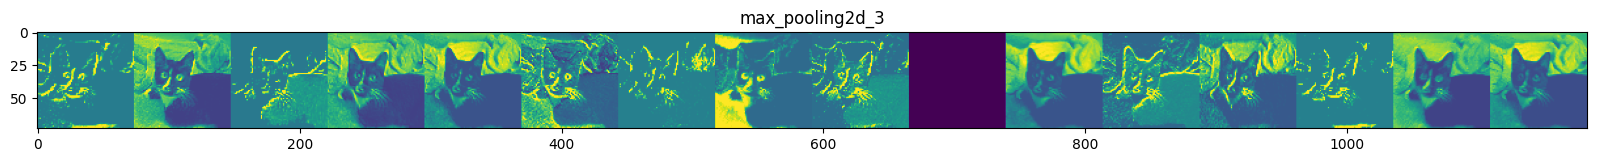

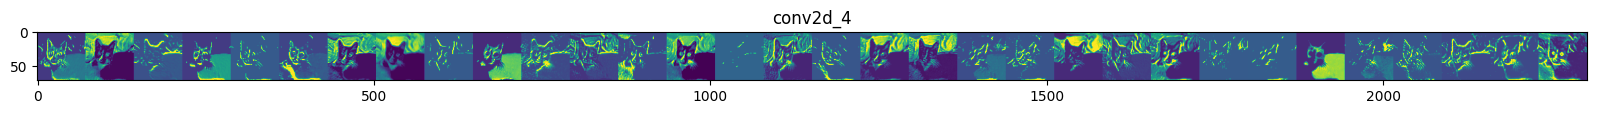

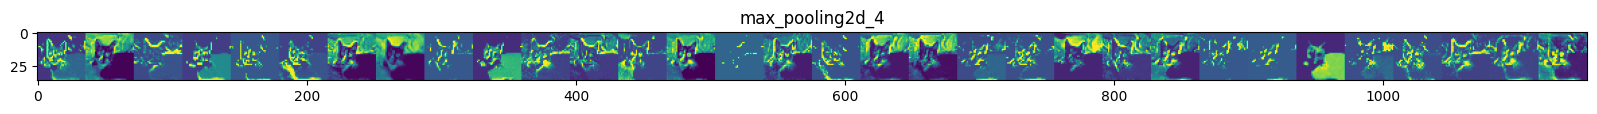

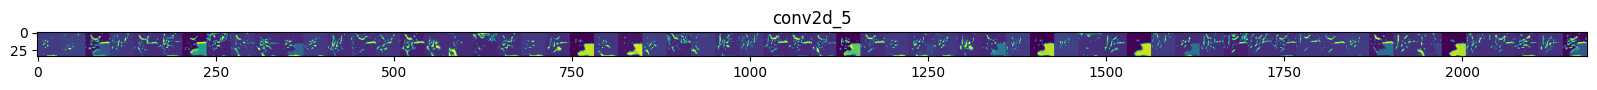

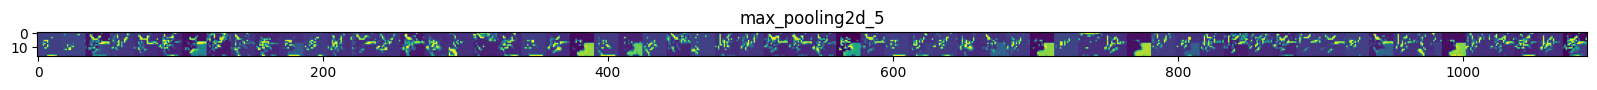

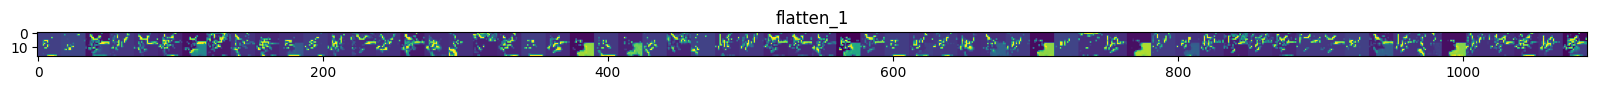

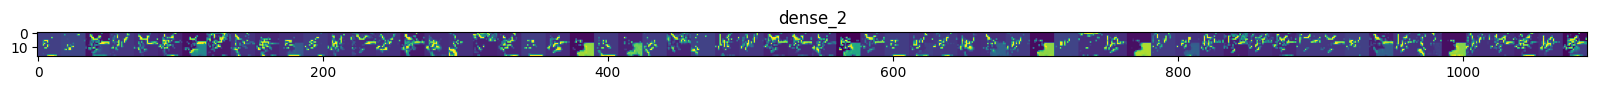

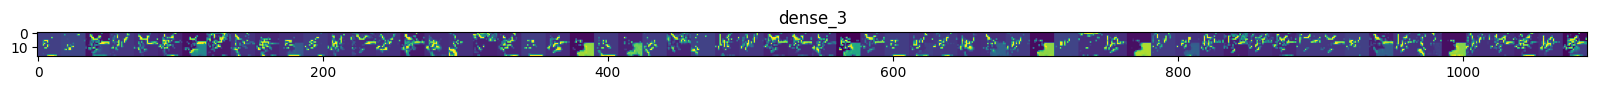

In [19]:
import numpy as np
# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  
    if len(feature_map.shape) == 4:
    
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size = feature_map.shape[1]  # feature map shape (1, size, size, n_features)
        display_grid = np.zeros((size, size * n_features))

        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

    #-----------------
    # Display the grid
    #-----------------
    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale) )
    plt.title ( layer_name )
    plt.grid  ( False )
    plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

Text(0.5, 1.0, 'Training and validation loss')

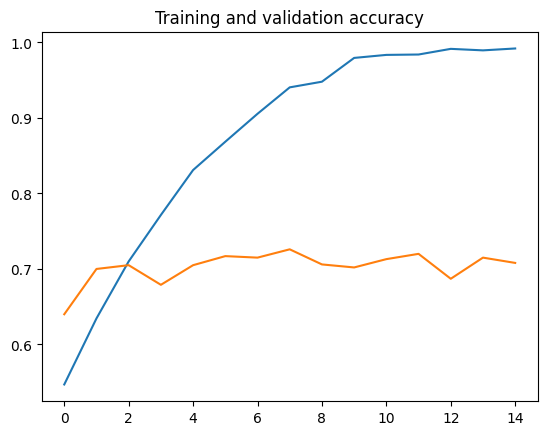

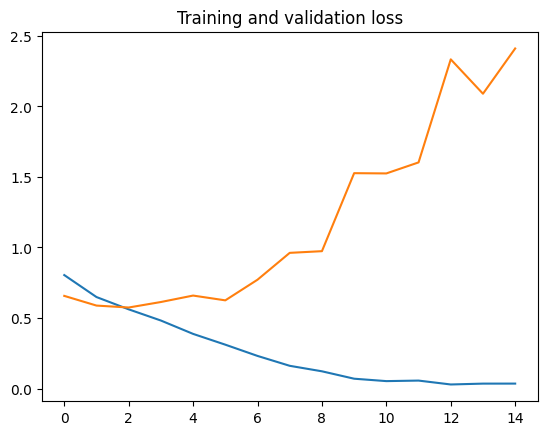

In [20]:
# Evaluating Accuracy and Loss for the Model
acc      = history.history[    'accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history[    'loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) 

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs,     acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot (epochs,     loss)
plt.plot (epochs, val_loss)
plt.title('Training and validation loss'   )

In [21]:
# Data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Train the new model
history_with_aug = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=1)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15
100/100 [==============================] - 106s 1s/step - loss: 0.7493 - accuracy: 0.6340 - val_loss: 0.6377 - val_accuracy: 0.6210
Epoch 2/15
100/100 [==============================] - 89s 888ms/step - loss: 0.6425 - accuracy: 0.6625 - val_loss: 0.6390 - val_accuracy: 0.6400
Epoch 3/15
100/100 [==============================] - 148s 1s/step - loss: 0.6282 - accuracy: 0.6615 - val_loss: 0.5558 - val_accuracy: 0.7270
Epoch 4/15
100/100 [==============================] - 117s 1s/step - loss: 0.6110 - accuracy: 0.6800 - val_loss: 0.5875 - val_accuracy: 0.6850
Epoch 5/15
100/100 [==============================] - 115s 1s/step - loss: 0.6159 - accuracy: 0.6640 - val_loss: 0.5911 - val_accuracy: 0.7150
Epoch 6/15
100/100 [==============================] - 91s 908ms/step - loss: 0.6131 - accuracy: 0.6860 - val_loss: 0.5384 - val_accuracy: 0.7150
Epoch 7/15
100/100 [==============================] - 

Text(0.5, 1.0, 'Training and validation loss')

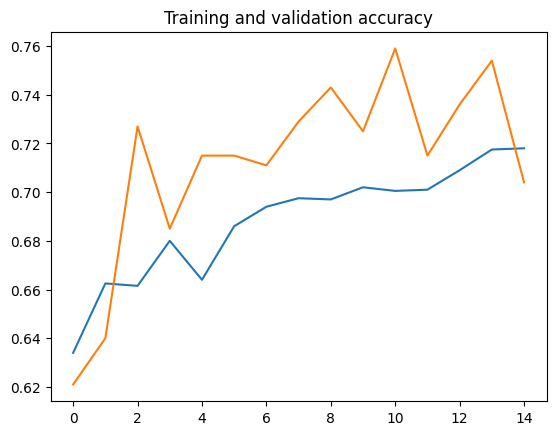

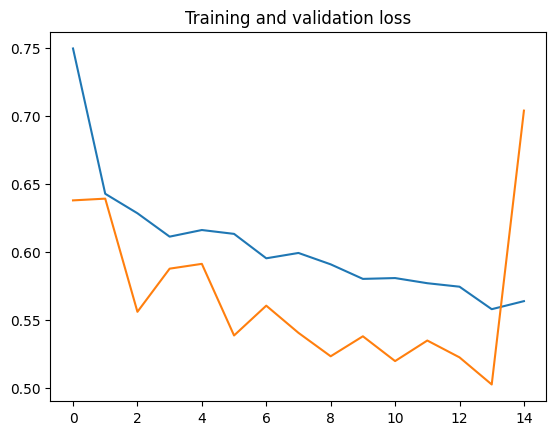

In [22]:
# Evaluating Accuracy and Loss for the Model
acc      = history_with_aug.history[    'accuracy']
val_acc  = history_with_aug.history['val_accuracy']
loss     = history_with_aug.history[    'loss']
val_loss = history_with_aug.history['val_loss']

epochs   = range(len(acc)) 

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs,     acc)
plt.plot  (epochs, val_acc)
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot (epochs,     loss)
plt.plot (epochs, val_loss)
plt.title('Training and validation loss'   )